In [170]:
import pandas as pd
import importlib
import utils
importlib.reload(utils)
from os import path
import time
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from datetime import datetime

In [22]:
data_path = pathlib.Path().absolute().joinpath('../I24_motion_GPS')
file_name = data_path.joinpath('tableview_210617_192904_VU1.csv')
df1 = utils.read_data(file_name,0,False)
file_name = data_path.joinpath('tableview_210617_192126_VU2.csv')
df2 = utils.read_data(file_name,0,False)

In [79]:
# convert string to datetime and to timestamps
df1 = df1.assign(datetime=[datetime.strptime(df1.UTC[i], '%H:%M:%S.%f %m/%d/%Y') for i in range(len(df1))])
df2 = df2.assign(UTC=[df2.UTC[i].replace('??/??/????','06/16/2021') for i in range(len(df2))])
df2 = df2.assign(datetime=[datetime.strptime(df2.UTC[i], '%H:%M:%S.%f %m/%d/%Y') for i in range(len(df2))])
df1['timestamp'] = df1.datetime.apply(lambda x: x.timestamp())
df2['timestamp'] = df2.datetime.apply(lambda x: x.timestamp())

In [155]:
# select the testbed region
df1s = df1[df1['Lat']<36.04]
df2s = df2[df2['Lat']<36.04]
# find the overlapped time range
laterStart = max(df1s.timestamp.iloc[0],df2s.timestamp.iloc[0])
earlyFinish = min(df1s.timestamp.iloc[-1],df2s.timestamp.iloc[-1])
df1s = df1s[(df1s['timestamp']>=laterStart) & (df1s['timestamp']<=earlyFinish)]
df2s = df2s[(df2s['timestamp']>=laterStart) & (df2s['timestamp']<=earlyFinish)]
df1s=df1s.reset_index()
df2s=df2s.reset_index()

# drop unrelavent columns
df1s = df1s.loc[:, df1s.columns.intersection(['datetime','timestamp','Lat','Lon'])]
df2s = df2s.loc[:, df2s.columns.intersection(['datetime','timestamp','Lat','Lon'])]

# resample according to 30hz frequency
df1re = df1s.resample('0.0333S', on='datetime').mean().interpolate('linear').reset_index()
df2re = df2s.resample('0.0333S', on='datetime').mean().interpolate('linear').reset_index()

df2re.drop(df2re.tail(1).index,inplace=True) # drop last n rows

# modify timestamp
df1re['timestamp'] = df1re.datetime.apply(lambda x: x.timestamp())
df2re['timestamp'] = df2re.datetime.apply(lambda x: x.timestamp())

In [160]:
# rename columns and concate into one df
df1re = df1re.rename(columns={'Lat':'lat1','Lon':'lon1'})
df2re = df2re.rename(columns={'Lat':'lat2','Lon':'lon2'})


In [171]:
utils.draw_map_scatter(df2s.Lat.values[::50], df2s.Lon.values[::50])


###############################

 Beginning Key Insertion ...

Key Insertion Completed!!


C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils.py:235: ResourceWarning: unclosed file <_io.TextIOWrapper name='test.html' mode='r' encoding='cp1252'>
  htmltxt = open(fname, 'r').read()
C:\Users\wangy79\Documents\I24_trajectory\I24-trajectory-generation\utils.py:239: ResourceWarning: unclosed file <_io.TextIOWrapper name='test.html' mode='w' encoding='cp1252'>
  open(fname, 'w').write(newtxt)


In [163]:
df2re = df2re.drop(columns=['datetime'])
dfre = pd.merge(df1re, df2re, on='timestamp')
dfre

,datetime,lat1,lon1,timestamp,lat2,lon2
0,2021-06-16 20:58:12.099000,35.993168,-86.596423,1.623877e+09,35.993253,-86.596631
1,2021-06-16 20:58:12.132300,35.993168,-86.596424,1.623877e+09,35.993253,-86.596631
2,2021-06-16 20:58:12.165600,35.993168,-86.596424,1.623877e+09,35.993253,-86.596631
3,2021-06-16 20:58:12.198900,35.993168,-86.596424,1.623877e+09,35.993253,-86.596631
4,2021-06-16 20:58:12.232200,35.993168,-86.596425,1.623877e+09,35.993254,-86.596632
...,...,...,...,...,...,...
33375,2021-06-16 21:16:43.486500,36.037308,-86.645889,1.623878e+09,36.037557,-86.646165
33376,2021-06-16 21:16:43.519800,36.037315,-86.645897,1.623878e+09,36.037563,-86.646172
33377,2021-06-16 21:16:43.553100,36.037321,-86.645904,1.623878e+09,36.037570,-86.646180
33378,2021-06-16 21:16:43.586400,36.037327,-86.645911,1.623878e+09,36.037576,-86.646187


Text(0.5,1,'car 2')

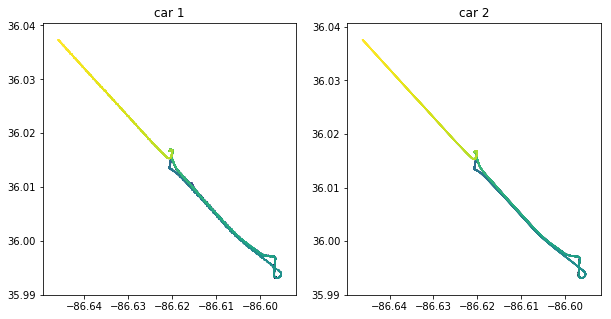

In [141]:
# plt.scatter(df1re.Lon, df1re.Lat,s=0.2,c=df1re.timestamp)
# plt.colorbar()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.scatter(df1re.Lon, df1re.Lat,s=0.2,c=df1re.timestamp)
ax1.set_title('car 1')
# fig.colorbar()
ax2.scatter(df2re.Lon, df2re.Lat,s=0.2,c=df2re.timestamp)  
ax2.set_title('car 2')
# ax2.colorbar()


In [164]:
dfre.to_csv('GPS_vu12.csv')

In [165]:
points = np.array(dfre[['lat1','lon1','lat2','lon2']])

In [167]:
d,_,_ = utils.euclidean_distance(points[:,0], points[:,1],points[:,2], points[:,3])


array([20.93868037, 20.92431305, 20.89857657, ..., 37.1714078 ,
       37.16180904, 37.17896861])

Text(0,0.5,'meter')

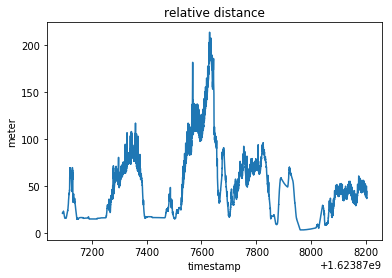

In [169]:
plt.plot(dfre.timestamp, d)
plt.title('relative distance')
plt.xlabel('timestamp')
plt.ylabel('meter')

In [173]:
df1s.timestamp[1]-df1s.timestamp[0]

0.03000020980834961